## Lectura de datos

In [57]:
import psycopg2
import sys
import pprint
from datetime import date, timedelta
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt

In [2]:
#Connection to server
def conectionDB():
   conn_string = "dbname='stic' port='5432' user='stic' password='stic2019' host='172.17.1.51'";
   #print ("Connecting to database ->{}".format(conn_string))
   conn = psycopg2.connect(conn_string);
   return conn


#Create a simple query
conn = conectionDB()
cursor = conn.cursor();

query = """
SELECT *
FROM BBVA
LIMIT 10;
"""

cursor.execute(query);
rows = cursor.fetchall()
df = pd.read_sql(query, conn) # storing the query in a pandas dataframe
print(df)

         id     client_id                      date   mcc country_code  \
0  73330955  p3pc4ImsGLE= 2017-06-13 23:48:57+00:00  7996           PE   
1  73331210  mFivCS2tCuA= 2017-06-21 21:09:15+00:00  4511           PE   
2  73331346  ZdGcYMCxHGA= 2017-06-25 00:01:55+00:00  4511           PE   
3  73331370  6jQJ6yBj+B4= 2017-06-05 14:21:42+00:00  4511           PE   
4  73331402  Qll2ycqmBXQ= 2017-06-17 15:47:44+00:00  4511           PE   
5  73331983  rMgexgf7cpA= 2017-06-30 11:17:30+00:00  5541           PE   
6  73332896  wI2/xls1yZM= 2017-06-25 18:24:01+00:00  5812           PE   
7  73333370  qxFKbKdUOYQ= 2017-06-18 13:32:46+00:00  5814           PE   
8  73333597  Trop8fKtxtk= 2017-06-24 21:43:23+00:00  7995           PE   
9  73333605  /u1KJSzj8Bo= 2017-06-14 08:36:55+00:00  7995           PE   

   amount_sol  amount_usd  nb_transaction  client_age client_gender  \
0       68.00   20.967528               1          36             F   
1       29.50    9.096207               1  

## Análisis Exploratorio

In [3]:
#Create a simple query
conn = conectionDB()
cursor = conn.cursor();

str1 = "SELECT COUNT"
str2 = " FROM BBVA;"
no_nulos = []

for var in df.columns:
    query = str1+"("+var+")"+str2
    cursor.execute(query);
    rows = cursor.fetchall()
    data = pd.read_sql(query, conn)
    no_nulos.append(data.loc[0,'count'])
    
#cursor.execute(query);
#rows = cursor.fetchall()
#datos = pd.read_sql(query, conn) # storing the query in a pandas dataframe
#print(datos)
print(no_nulos)

[116857449, 116857449, 116857449, 95854910, 102730751, 116857449, 116857449, 116857449, 106391803, 116857449, 116857449, 116857449, 106315657, 106315657, 106315657, 80682210, 116857449, 116857449, 116857449, 116857449, 116857449, 116857449, 116857449, 71202986, 42850193, 42850193, 0]


In [4]:
data_tuples = list(zip(df.columns,no_nulos))
tabla = pd.DataFrame(data_tuples,columns=['variable','num_no_nulos'])
porc_nulos = []
maxi = max(tabla['num_no_nulos'])
for val in tabla['num_no_nulos']:
    porc_nulos.append(((maxi-val)/maxi)*100)

tabla['porc_nulos'] = porc_nulos    
print(tabla)

                variable  num_no_nulos  porc_nulos
0                     id     116857449    0.000000
1              client_id     116857449    0.000000
2                   date     116857449    0.000000
3                    mcc      95854910   17.972786
4           country_code     102730751   12.088830
5             amount_sol     116857449    0.000000
6             amount_usd     116857449    0.000000
7         nb_transaction     116857449    0.000000
8             client_age     106391803    8.955908
9          client_gender     116857449    0.000000
10            debit_type     116857449    0.000000
11             agency_id     116857449    0.000000
12    agency_departement     106315657    9.021070
13       agency_province     106315657    9.021070
14       agency_district     106315657    9.021070
15           agency_lima      80682210   30.956725
16         agency_region     116857449    0.000000
17           merchant_id     116857449    0.000000
18         merchant_name     11

In [5]:
#Consulta para obtener el número de transacciones realizadas en cada distrito
conn = conectionDB()
cursor = conn.cursor();

query = """
SELECT merchant_district, COUNT(*)
FROM BBVA
WHERE merchant_province = 'LIMA'
GROUP BY merchant_district;
"""

cursor.execute(query);
rows = cursor.fetchall()
distritos = pd.read_sql(query, conn) # storing the query in a pandas dataframe
print(distritos)

       merchant_district     count
0      Santiago De Surco   3680261
1   San Juan De Luriganc   1011841
2                  Brena    373390
3             Carabayllo     42219
4             Miraflores  14706933
5             San Miguel   1542658
6      Magdalena Del Mar   3366578
7            El Agustino    106461
8   Villa Maria Del Triu     95068
9             Lurigancho     80733
10             La Molina    668598
11           Punta Negra     27043
12           Cieneguilla     34565
13         Independencia    577270
14                 Comas    214846
15           La Victoria    460361
16                 Lurin    175371
17                 Rimac    700007
18           Jesus Maria    644481
19             Surquillo    855908
20             San Borja   5228944
21              Pucusana      5790
22                   Ate    882571
23           Santa Anita    280398
24                 Lince    471301
25         Punta Hermosa    110386
26            Santa Rosa      4431
27            Los Ol

([<matplotlib.axis.XTick at 0x25ebfdc0710>,
 <a list of 43 Text xticklabel objects>)

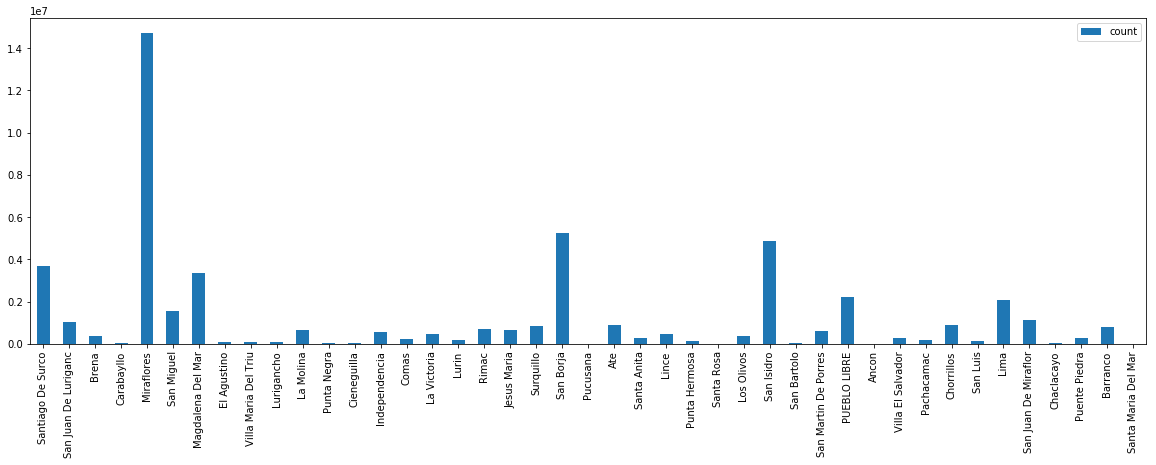

In [6]:
#plt.figure(figsize=(20,20))
distritos.plot(kind="bar", figsize=(20,6), stacked=False)
plt.xticks([r for r in range(len(distritos['merchant_district']))], distritos['merchant_district'], rotation=90)

In [9]:
export_excel = distritos.to_excel (r'C:\Users\LENOVO\Documents\Maestría_Informática\Trabajo_Final\tabla_distritosVO.xlsx', index = None, header=True) 

### Comparación con Densidad Poblacional

In [11]:
datos_distritos = pd.read_excel (r'C:\Users\LENOVO\Documents\Maestría_Informática\Trabajo_Final\tabla_distritos.xlsx', sheet_name='Hoja1')
datos_distritos.head()  

,Poblacion,Dens_Pob,Porc_Pob,Num_Transacc,Porc_Transacc
Lima,265693,12088,2.895882,2077489,4.135701
Ancón,41474,139,0.452040,12006,0.023901
Ate,661786,8515,7.213040,882571,1.756953
Barranco,28970,8700,0.315754,776905,1.546601
Breña,74711,23202,0.814302,373390,0.743315


La siguiente gráfica muestra la relación entre el porcentaje de población en cada distrito y el porcentaje de transacciones que se realizan en los mismos. La línea roja corresponde a una correlación lineal que se obtendría si ambos porcentajes coincidieran en cada distrito.

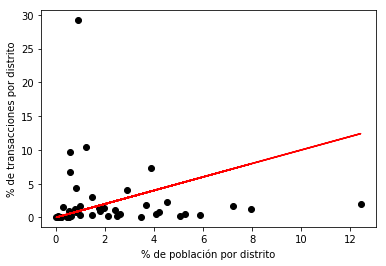

In [20]:
#from numpy.polynomial.polynomial import polyfit
x = datos_distritos['Porc_Pob']
y = datos_distritos['Porc_Transacc']
plt.plot(x, y, 'o', color='black')
plt.plot(x, x, '-r')
plt.xlabel('% de población por distrito')
plt.ylabel('% de transacciones por distrito')

#b, m = polyfit(x, y, 1)
#plt.plot(x, b + m * x, '-')
plt.show()

In [26]:
#Consulta para obtener el intervalo en el que están comprendidas las fechas
conn = conectionDB()
cursor = conn.cursor();

query = """
SELECT MIN(date), MAX(date)
FROM BBVA;
"""

cursor.execute(query);
rows = cursor.fetchall()
fechas = pd.read_sql(query, conn) # storing the query in a pandas dataframe
print(fechas)

                        min                       max
0 2016-05-31 22:00:00+00:00 2017-10-31 22:59:59+00:00


In [31]:
#Consulta para obtener el número de usuarios que realizaron transacciones en cada distrito en un día determinado
conn = conectionDB()
cursor = conn.cursor();

query = """
SELECT merchant_district, COUNT(DISTINCT id)
FROM BBVA
WHERE (merchant_province = 'LIMA') AND (date BETWEEN '2017-10-30 22:59:59+00:00' AND '2017-10-31 22:59:59+00:00')
GROUP BY merchant_district;
"""

cursor.execute(query);
rows = cursor.fetchall()
usuarios = pd.read_sql(query, conn) # storing the query in a pandas dataframe
print(usuarios)

       merchant_district  count
0      Villa El Salvador    580
1             Lurigancho    182
2            Cieneguilla     43
3            San Bartolo     20
4   San Martin De Porres   1410
5             Chaclacayo    118
6          Puente Piedra    706
7               Barranco   1362
8    Santa Maria Del Mar      7
9             Chorrillos   1980
10              San Luis    281
11                  Lima   4668
12  San Juan De Miraflor   2281
13         Independencia   1252
14                 Comas    473
15            San Miguel   3166
16     Magdalena Del Mar   7756
17           El Agustino    241
18  Villa Maria Del Triu    212
19          PUEBLO LIBRE   4672
20                 Ancon     21
21  San Juan De Luriganc   2407
22                 Brena    687
23            Carabayllo    147
24            Miraflores  31414
25             San Borja  10887
26              Pucusana     17
27           Santa Anita    601
28                   Ate   1981
29     Santiago De Surco   7626
30      

In [32]:
export_usuarios = usuarios.to_excel (r'C:\Users\LENOVO\Documents\Maestría_Informática\Trabajo_Final\tabla_usuariosVO.xlsx', index = None, header=True) 

In [53]:
datos_usuarios = pd.read_excel (r'C:\Users\LENOVO\Documents\Maestría_Informática\Trabajo_Final\tabla_usuarios.xlsx', sheet_name='Hoja1')
datos_usuarios.head()  

,Distrito,Poblacion,Dens_Pob,Porc_Pob,Num_Usrs,Porc_Usrs
0,Lima,265693,12088,2.895882,4668,4.252605
1,Ancón,41474,139,0.452040,21,0.019131
2,Ate,661786,8515,7.213040,1981,1.804715
3,Barranco,28970,8700,0.315754,1362,1.240799
4,Breña,74711,23202,0.814302,687,0.625865


A continuación, se compara el número de usuarios que realizaron alguna transacción en un día determinado con la cantidad de personas que sería necesario seleccionar para conformar una muestra aleatoria en cada distrito. La muestra aleatoria es seleccionada tomando como parámetros un margen de error del 2% y un intervalo de confianza igual al 99%.

In [54]:
import sample_size
import math
margin_error = 0.02
confidence_level = 0.99
muestra = []
for pob in datos_usuarios['Poblacion']:
    muestra.append(math.ceil(sample_size.sampleSize(pob,margin_error,confidence_level)))

datos_usuarios['Muestra'] = muestra

In [55]:
datos_usuarios.head()

,Distrito,Poblacion,Dens_Pob,Porc_Pob,Num_Usrs,Porc_Usrs,Muestra
0,Lima,265693,12088,2.895882,4668,4.252605,4084
1,Ancón,41474,139,0.452040,21,0.019131,3771
2,Ate,661786,8515,7.213040,1981,1.804715,4122
3,Barranco,28970,8700,0.315754,1362,1.240799,3629
4,Breña,74711,23202,0.814302,687,0.625865,3930


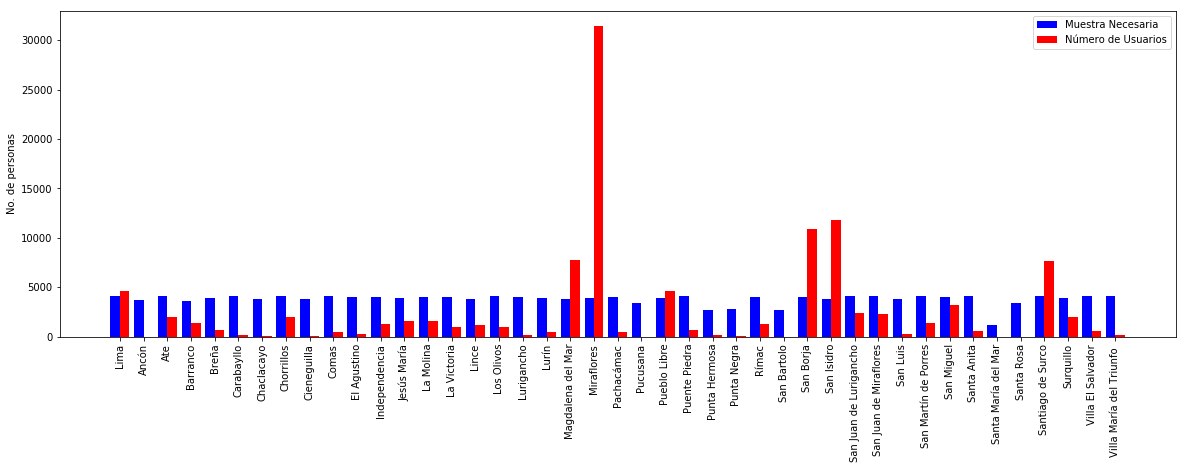

In [72]:
x = np.arange(datos_usuarios.shape[0])
ax1 = plt.subplots(1,1,figsize=(20,6))
w = 0.4
plt.xticks(x + w /2, datos_usuarios['Distrito'], rotation='vertical')
sample = plt.bar(x, datos_usuarios['Muestra'], width=w, color='b', align='center')
users = plt.bar(x + w, datos_usuarios['Num_Usrs'], width=w,color='r', align='center')
plt.ylabel('No. de personas')
plt.legend([sample, users],['Muestra Necesaria', 'Número de Usuarios'])
plt.show()

In [49]:
sample_size.sampleSize(28970,0.05,0.99)

648.7401579267271